In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 
import numpy as np

On va créer des datasets pour chaque candidats :

In [105]:
df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')
df0 = df[['Code du département', 'Libellé du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]
df_AN = df[['N°Panneau.AN', 'Sexe.AN', 'Nom.AN', 'Prénom.AN', 'Voix.AN', '% Voix/Ins.AN', '% Voix/Exp.AN']]
df_RF = df[['N°Panneau.RF', 'Sexe.RF', 'Nom.RF', 'Prénom.RF', 'Voix.RF', '% Voix/Ins.RF', '% Voix/Exp.RF']]
df_ME = df[['N°Panneau.ME', 'Sexe.ME', 'Nom.ME', 'Prénom.ME', 'Voix.ME', '% Voix/Ins.ME', '% Voix/Exp.ME']]
df_LJ = df[['N°Panneau.LJ', 'Sexe.LJ', 'Nom.LJ', 'Prénom.LJ', 'Voix.LJ', '% Voix/Ins.LJ', '% Voix/Exp.LJ']]
df_LPM = df[['N°Panneau.LPM', 'Sexe.LPM', 'Nom.LPM', 'Prénom.LPM', 'Voix.LPM', '% Voix/Ins.LPM', '% Voix/Exp.LPM']]
df_ZE = df[['N°Panneau.ZE', 'Sexe.ZE', 'Nom.ZE', 'Prénom.ZE', 'Voix.ZE', '% Voix/Ins.ZE', '% Voix/Exp.ZE']]
df_MJL = df[['N°Panneau.MJL', 'Sexe.MJL', 'Nom.MJL', 'Prénom.MJL', 'Voix.MJL', '% Voix/Ins.MJL', '% Voix/Exp.MJL']]
df_HA = df[['N°Panneau.HA', 'Sexe.HA', 'Nom.HA', 'Prénom.HA', 'Voix.HA', '% Voix/Ins.HA', '% Voix/Exp.HA']]
df_JY = df[['N°Panneau.JY', 'Sexe.JY', 'Nom.JY', 'Prénom.JY', 'Voix.JY', '% Voix/Ins.JY', '% Voix/Exp.JY']]
df_PV = df[['N°Panneau.PV', 'Sexe.PV', 'Nom.PV', 'Prénom.PV', 'Voix.PV', '% Voix/Ins.PV', '% Voix/Exp.PV']]
df_PP = df[['N°Panneau.PP', 'Sexe.PP', 'Nom.PP', 'Prénom.PP', 'Voix.PP', '% Voix/Ins.PP', '% Voix/Exp.PP']]
df_DAN = df[['N°Panneau.DAN', 'Sexe.DAN', 'Nom.DAN', 'Prénom.DAN', 'Voix.DAN', '% Voix/Ins.DAN', '% Voix/Exp.DAN']]

c:\Users\hedil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [106]:
print("Nombre de variables dans le dataset général : ", df.shape[1])
print("Nombre d'observations dans le dataset général : ", df.shape[0])

print("Nombre de variables dans le dataset 0 : ", df0.shape[1])
print("Nombre d'observations dans le dataset 0 : ", df0.shape[0])

print("Nombre de variables dans un dataset candidat : ", df_AN.shape[1])
print("Nombre d'observations dans un dataset candidat : ", df_AN.shape[0])

Nombre de variables dans le dataset général :  105
Nombre d'observations dans le dataset général :  69681
Nombre de variables dans le dataset 0 :  21
Nombre d'observations dans le dataset 0 :  69681
Nombre de variables dans un dataset candidat :  7
Nombre d'observations dans un dataset candidat :  69681


On calcule le nombre d'inscrits, de participants et de personnes s'étant abstenues :

In [113]:
#Stats générales : 

totalIns = np.sum(df['Inscrits'])
totalVot = np.sum(df['Votants'])
totalBlanc = np.sum(df['Blancs'])
totalAbs = np.sum(df['Abstentions'])

print("Nombre d'inscrits : ", totalIns)
print("Nombre de votants : ", totalVot)
print("Nombre d'abstentionnistes : ", totalAbs)
print("Nombre de votes blancs : ", totalBlanc)

Nombre d'inscrits :  48747231
Nombre de votants :  35923170
Nombre d'abstentionnistes :  12824061
Nombre de votes blancs :  543593


In [124]:
# Quels sont les différents taux ?

rappVot = 100*totalVot/totalIns
rappAbs = 100*totalAbs/totalIns
rappBlanc = 100*totalBlanc/totalIns


print("Absentention : ", round(rappAbs, 2), "%")
print("Participation : ", round(rappVot, 2), "%")
print("Dont", round(rappBlanc, 2), "% de votes blancs")

Absentention :  26.31 %
Participation :  73.69 %
Dont 1.12 % de votes blancs


Une abstention de 26.ME%, ce qui est assez remarquable.
Plus que n'importe quel candidat.
Traçons les diagrammes camemberts des résultats sans puis avec abstentions et votes blancs:

In [127]:
voixCandidat = np.array([np.sum(df['Voix.1']), np.sum(df['Voix.2']), np.sum(df['Voix.3']), np.sum(df['Voix.LJ']), np.sum(df['Voix.5']), 
np.sum(df['Voix.ZE']), np.sum(df['Voix.MJL']), np.sum(df['Voix.HA']), np.sum(df['Voix.JY']), np.sum(df['Voix.PV']), np.sum(df['Voix.PP']), 
np.sum(df['Voix.DAN'])])


label = [df['Nom.1'][0], df['Nom.2'][0], df['Nom.3'][0], df['Nom.4'][0], df['Nom.5'][0], df['Nom.6'][0], df['Nom.7'][0], df['Nom.8'][0], 
df['Nom.9'][0], df['Nom.PV'][0], df['Nom.PP'][0], df['Nom.12'][0]]

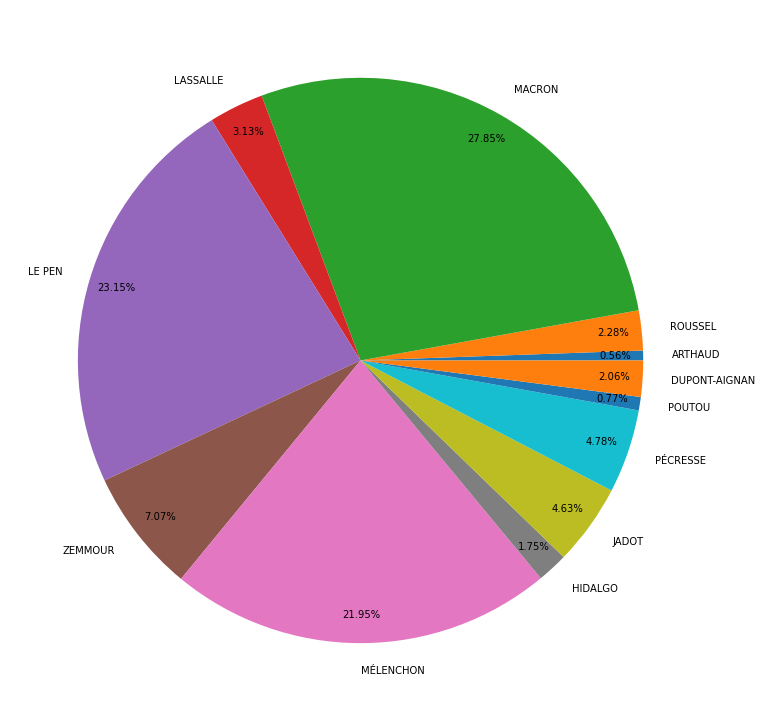

In [128]:
camembert = plt.pie(voixCandidat, labels=label, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance=0.9)
plt.rcParams["figure.figsize"] = [13, 13]
plt.show()

Avec l'abstention et les votes blancs :

In [129]:
voixCandidat1 = np.array([np.sum(df['Voix.1']), np.sum(df['Voix.2']), np.sum(df['Voix.3']), np.sum(df['Voix.4']), np.sum(df['Voix.5']), 
np.sum(df['Voix.6']), np.sum(df['Voix.7']), np.sum(df['Voix.8']), np.sum(df['Voix.9']), np.sum(df['Voix.PV']), np.sum(df['Voix.11']), np.sum(df['Voix.12']), np.sum(df['Blancs']), totalAbs])

label1 = [df['Nom.1'][0], df['Nom.2'][0], df['Nom.3'][0], df['Nom.4'][0], df['Nom.5'][0], df['Nom.6'][0], df['Nom.7'][0], df['Nom.8'][0], 
df['Nom.9'][0], df['Nom.10'][0], df['Nom.11'][0], df['Nom.12'][0], 'BLANCS', 'ABSTENTION']

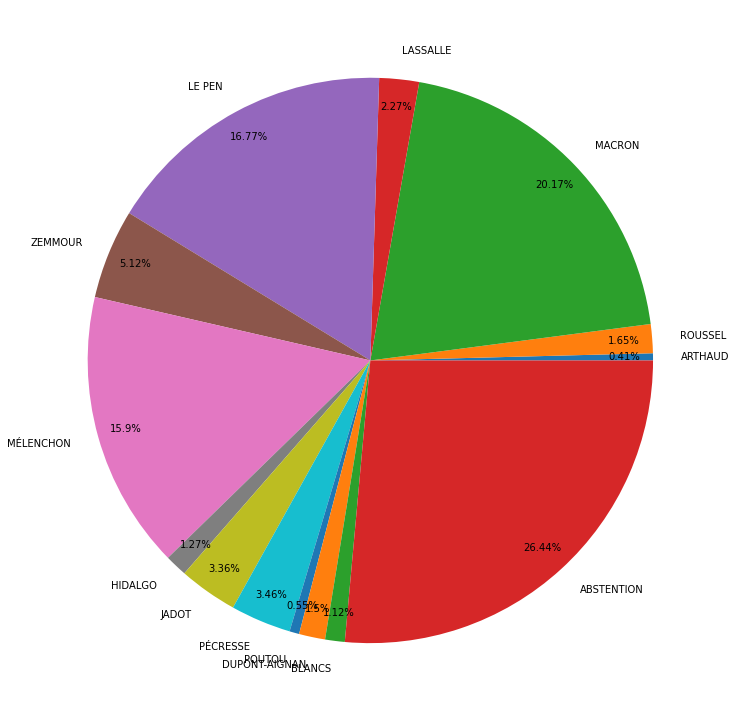

In [130]:
camembert = plt.pie(voixCandidat1, labels=label1, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance = 0.9, labeldistance = 1.1)
plt.rcParams["figure.figsize"] = [13, 13]
plt.show()

On peut voir que l'abstention a joué un rôle très important dans ce 1er tour.
En effet, n'importe quel candidat pourrait arriver 1er si il récupérait les voix de l'abstention

In [169]:
dftemp = pd.pivot_table(data = df, index = 'Libellé de la commune', values = 'Voix.6', aggfunc = 'sum')
dftemp

,Voix.6
Libellé de la commune,
Aast,8
Abainville,17
Abancourt,45
Abaucourt,15
Abaucourt-Hautecourt,5
...,...
Éloise,36
Étercy,45
Étrembières,56
